In [98]:
%config IPCompleter.greedy=True

# WEB SCRAPPING

We are using cloudscraper to bypass cloudfare antibot agent. We have a base url that is iterated each time we have to access the next page. We get into a page, fetch the facility name and total reviews for that facility. While scrapping we encountered that there is very less recent data hence we could not perform our analysis over the countermeasures facility might be taking or should take in this pandemic. But we went further and scrapped all four ratings in a list, then divided that list into four ratings.

In [ ]:
import requests
import pandas as pd 
import cloudscraper
from bs4 import BeautifulSoup


import cloudscraper

scraper = cloudscraper.create_scraper()

base_url = "https://www.ratemds.com/facilities/?country=ca&page={}"  # Change base url to this
# Moved the list of dicts outsided of the main loop
name = []
location = []
ratings = []
col = ["Name","Cleanliness","Facility","Services","Value","Review"]
final_df = pd.DataFrame(columns=col)

for page in range(1, 300):
    r = scraper.get(base_url.format(page))   #  substitute 'page' variable in base_url
    c = r.content
    soup = BeautifulSoup(c, 'html.parser')
    all = soup.find_all("div", {"class": "search-item"})
    for item in all:
        facility = {}
        each_Name = {}
        each_Ratings = {}
        facility["Name"] = item.find("h2", {"class": "search-item-info search-item-location-name"}).text
        facility["Rating"] = item.find("div", {"class": "star-rating-count"}).text
        n = item.find("a", {"class": "search-item-location-link"})
        a = n.get('href')
        new_url = ("https://www.ratemds.com"+a)
        facility["URL"] = new_url
        r1 = scraper.get(new_url)
        c1 = r1.content
        soup1 = BeautifulSoup(c1, 'html.parser')
        sve = soup1.find_all("span", {"class": "value"})
        
        for row in sve:
                try:

                    each_Ratings= row.text
                    ratings.append(each_Ratings)
                except:

                    each_Ratings = None

                pass
        sv2 = soup1.find_all("p",{"class": "reviewBody white-space-paragraph"})
        for rows in sv2:
                try:
                    each_Name = facility["Name"]
                    each_review= rows.text
                    location.append(each_review)
                    name.append(each_Name)
                except: 
                    each_Name = None
                    each_review= None
                pass

Rating_df = pd.DataFrame(ratings, columns =['Ratings'])
Name_df = pd.DataFrame(name, columns=['Location Name'])
Review_df = pd.DataFrame(location, columns=['Reviews'])

# PROCESSING SCRAPED DATA

After Scraping the data, we have the list of ratings which is divided into four measures cleanliness, facility, services and value. This is to club all the data to make dataframe.

In [85]:
cleanliness = []
facilities = []
services = []
value = []
final_df = pd.DataFrame()
for x in range(0,len(ratings),4):
    cleanliness.append(ratings[x])
for y in range(1,len(ratings),4):
    facilities.append(ratings[y])
for w in range(2,len(ratings),4):
    services.append(ratings[w])
for z in range(3,len(ratings),4):
    value.append(ratings[z])
cleanliness_df = pd.DataFrame(cleanliness,columns=['Cleanliness'])
facilty_df = pd.DataFrame(facilities,columns=['Facilities'])
service_df = pd.DataFrame(services,columns=['Services'])
value_df = pd.DataFrame(value,columns=['Value'])

final_df['Facility Name'] = Name_df['Location Name']
final_df['Cleanliness'] = cleanliness_df['Cleanliness']
final_df['Facilities'] = facilty_df['Facilities']
final_df['Services'] = service_df['Services']
final_df['Value'] = value_df['Value']
final_df['Review'] = Review_df['Reviews']
final_df.to_csv("1-300_facility_data.csv")

In [197]:
final_df.memory_usage()

Index          0
Name           0
Cleanliness    0
Facility       0
Services       0
Value          0
Review         0
dtype: int64

# ASSEMBELLING ALL THE SCRAPPED DATA

Since, scrapping was taking quite long so we decided to break it in chunks and then reclub the data back.

In [212]:
import pandas as pd 
one = pd.read_csv("1-100_facility_data.csv") 
two = pd.read_csv("100-150_facility_data.csv") 
three = pd.read_csv("151-250_facility_data.csv") 
four = two = pd.read_csv("251-252_facility_data.csv") 

In [213]:
facilityReview_df = pd.DataFrame()
facilityReview_df = pd.concat([one,two,three,four],ignore_index=True)
facilityReview_df

,Unnamed: 0,Facility Name,Cleanliness,Facilities,Services,Value,Review
0,0,Century Stone Dental,5,5,5,5.0,Just wanted to show some support for my dentis...
1,1,Century Stone Dental,5,5,5,5.0,"Everyone from the front desk reception staff, ..."
2,2,Century Stone Dental,5,5,5,5.0,Excellent service. My children had a tongue an...
3,3,Century Stone Dental,5,5,5,5.0,I had a great experience during my first visit...
4,4,Century Stone Dental,5,5,5,5.0,I couldn’t be more pleased with my experience ...
...,...,...,...,...,...,...,...
5763,1970,Centre Hospitalier Le Gardeaur,1,1,1,1.0,Worst hospital ever! Have been to ER 3 times a...
5764,1971,Centre Hospitalier Le Gardeaur,5,4,4,4.0,Le Centre hospitalier le Gardeur est en croiss...
5765,0,Holy Family Hospital,5,5,5,5.0,The Rehab floor is second to none. Great physi...
5766,1,Holy Family Hospital,1,1,2,1.0,"Dirty, language barrier from many staff, in ed..."


In [214]:
#Vizualization libraries
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import random


Let’s check the .describe() method to see how many instances we’re dealing with and other basic statistics:

In [215]:
facilityReview_df.describe()

,Unnamed: 0,Cleanliness,Facilities,Services,Value
count,5768.000000,5768.000000,5768.000000,5768.000000,5767.000000
mean,1581.755721,4.124480,4.007282,3.845354,3.833189
std,1042.074293,1.405149,1.493625,1.699971,1.675222
min,0.000000,1.000000,1.000000,1.000000,1.000000
25%,717.750000,4.000000,3.000000,2.000000,2.000000
50%,1438.500000,5.000000,5.000000,5.000000,5.000000
75%,2347.250000,5.000000,5.000000,5.000000,5.000000
max,3789.000000,5.000000,5.000000,5.000000,5.000000


### It appears facilities in Canada have performed very well in this sample. The overall mean for ratings is 4.0, and the 75% mark is a 5 star review! This tells us there are a disproportionate amount of 1 star reviews. Hopefully we can gain insight into this by building a model.

In [216]:
#checking for nulls
null_count = facilityReview_df.isnull().sum()
null_count

Unnamed: 0       0
Facility Name    0
Cleanliness      0
Facilities       0
Services         0
Value            1
Review           0
dtype: int64

Removing NULL instances.

In [217]:
facilityReview_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [218]:
#checking for nulls
null_count = facilityReview_df.isnull().sum()
null_count

Unnamed: 0       0
Facility Name    0
Cleanliness      0
Facilities       0
Services         0
Value            0
Review           0
dtype: int64

# VISUALIZATION

The charts below showcase the count of each rating over total number of ratings, it will provide an Idea if all the ratings are positively skewed and If skewed how well the model will perform to know if the rating is positive or negative.

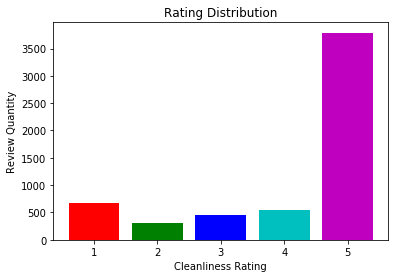

In [219]:
#seperating by groups
groups = facilityReview_df.groupby('Cleanliness').count()
Values = groups.Review
colors = ['r', 'g', 'b', 'c', 'm']
#making bar plot
plt.bar(([1,2,3,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Review Quantity')
plt.show()

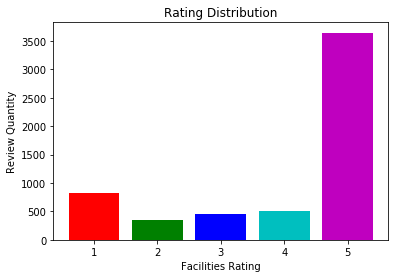

In [220]:
#seperating by groups
groups = facilityReview_df.groupby('Facilities').count()
Values = groups.Review
colors = ['r', 'g', 'b', 'c', 'm']
#making bar plot
plt.bar(([1,2,3,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Facilities Rating')
plt.ylabel('Review Quantity')
plt.show()

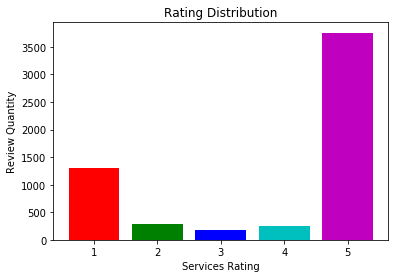

In [221]:
#seperating by groups
groups = facilityReview_df.groupby('Services').count()
Values = groups.Review
colors = ['r', 'g', 'b', 'c', 'm']
#making bar plot
plt.bar(([1,2,3,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Services Rating')
plt.ylabel('Review Quantity')
plt.show()

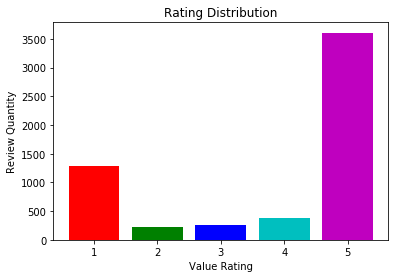

In [222]:
#seperating by groups
groups = facilityReview_df.groupby('Value').count()
Values = groups.Review
colors = ['r', 'g', 'b', 'c', 'm']
#making bar plot
plt.bar(([1,2,3,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Value Rating')
plt.ylabel('Review Quantity')
plt.show()

# In order to perform the logistic regression later, we need to figure out a way to turn these 5 ratings categories into binary classes (1 and 0). Remember, logistic regression only handles “either/or” target variables. The best way to turn the star ratings into binary classes(in my opinion) is:
Set ratings below 3 stars as class 0 (negative sentiment)
Set ratings above 3 as class 1 (positive sentiment)
Delete the 3 star ratings. 3 stars are neutral and offer no sentiment insight.
So, let’s make a new column that deletes the 3 star ratings and creates a new column which classifies the other ratings into binary classes:

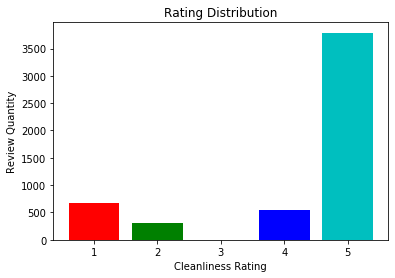

In [223]:
#deleting all instances with Cleanliness = 3
facilityReview_df = facilityReview_df[facilityReview_df.Cleanliness != 3]
#separating by groups
groups = facilityReview_df.groupby('Cleanliness').count()
Values = groups.Review
colors = ['r', 'g', 'b', 'c']
#making bar plot
plt.bar(([1,2,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Review Quantity')
plt.show()

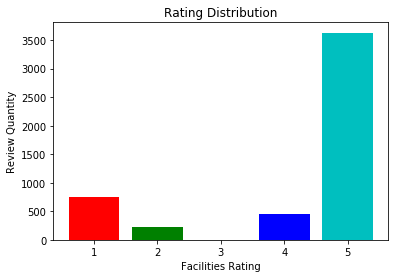

In [224]:
#deleting all instances with Facilities = 3
facilityReview_df = facilityReview_df[facilityReview_df.Facilities != 3]
#separating by groups
groups = facilityReview_df.groupby('Facilities').count()
Values = groups.Review
colors = ['r', 'g', 'b', 'c']
#making bar plot
plt.bar(([1,2,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Facilities Rating')
plt.ylabel('Review Quantity')
plt.show()

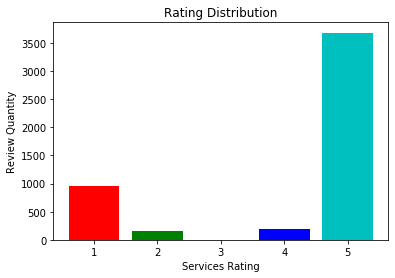

In [225]:
#deleting all instances with Services = 3
facilityReview_df = facilityReview_df[facilityReview_df.Services != 3]
#separating by groups
groups = facilityReview_df.groupby('Services').count()
Values = groups.Review
colors = ['r', 'g', 'b', 'c']
#making bar plot
plt.bar(([1,2,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Services Rating')
plt.ylabel('Review Quantity')
plt.show()

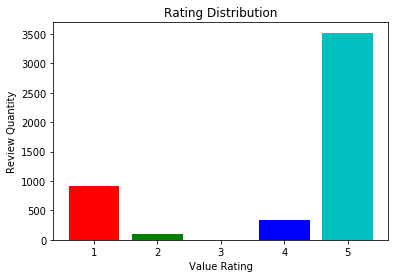

In [226]:
#deleting all instances with Value = 3
facilityReview_df = facilityReview_df[facilityReview_df.Value != 3]
#separating by groups
groups = facilityReview_df.groupby('Value').count()
Values = groups.Review
colors = ['r', 'g', 'b', 'c']
#making bar plot
plt.bar(([1,2,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Value Rating')
plt.ylabel('Review Quantity')
plt.show()

### Creating binary columns for all four review measures to perform logistic regression.

In [227]:
#creating new cleanliness_binary_class column
facilityReview_df['cleanliness_binary_class'] = np.where(facilityReview_df['Cleanliness'] > 3, 1, 0)
facilityReview_df

,Unnamed: 0,Facility Name,Cleanliness,Facilities,Services,Value,Review,cleanliness_binary_class
0,0,Century Stone Dental,5,5,5,5.0,Just wanted to show some support for my dentis...,1
1,1,Century Stone Dental,5,5,5,5.0,"Everyone from the front desk reception staff, ...",1
2,2,Century Stone Dental,5,5,5,5.0,Excellent service. My children had a tongue an...,1
3,3,Century Stone Dental,5,5,5,5.0,I had a great experience during my first visit...,1
4,4,Century Stone Dental,5,5,5,5.0,I couldn’t be more pleased with my experience ...,1
...,...,...,...,...,...,...,...,...
5763,1970,Centre Hospitalier Le Gardeaur,1,1,1,1.0,Worst hospital ever! Have been to ER 3 times a...,0
5764,1971,Centre Hospitalier Le Gardeaur,5,4,4,4.0,Le Centre hospitalier le Gardeur est en croiss...,1
5765,0,Holy Family Hospital,5,5,5,5.0,The Rehab floor is second to none. Great physi...,1
5766,1,Holy Family Hospital,1,1,2,1.0,"Dirty, language barrier from many staff, in ed...",0


In [228]:
facilityReview_df['facility_binary_class'] = np.where(facilityReview_df['Facilities'] > 3, 1, 0)
facilityReview_df

,Unnamed: 0,Facility Name,Cleanliness,Facilities,Services,Value,Review,cleanliness_binary_class,facility_binary_class
0,0,Century Stone Dental,5,5,5,5.0,Just wanted to show some support for my dentis...,1,1
1,1,Century Stone Dental,5,5,5,5.0,"Everyone from the front desk reception staff, ...",1,1
2,2,Century Stone Dental,5,5,5,5.0,Excellent service. My children had a tongue an...,1,1
3,3,Century Stone Dental,5,5,5,5.0,I had a great experience during my first visit...,1,1
4,4,Century Stone Dental,5,5,5,5.0,I couldn’t be more pleased with my experience ...,1,1
...,...,...,...,...,...,...,...,...,...
5763,1970,Centre Hospitalier Le Gardeaur,1,1,1,1.0,Worst hospital ever! Have been to ER 3 times a...,0,0
5764,1971,Centre Hospitalier Le Gardeaur,5,4,4,4.0,Le Centre hospitalier le Gardeur est en croiss...,1,1
5765,0,Holy Family Hospital,5,5,5,5.0,The Rehab floor is second to none. Great physi...,1,1
5766,1,Holy Family Hospital,1,1,2,1.0,"Dirty, language barrier from many staff, in ed...",0,0


In [229]:
facilityReview_df['services_binary_class'] = np.where(facilityReview_df['Services'] > 3, 1, 0)
facilityReview_df

,Unnamed: 0,Facility Name,Cleanliness,Facilities,Services,Value,Review,cleanliness_binary_class,facility_binary_class,services_binary_class
0,0,Century Stone Dental,5,5,5,5.0,Just wanted to show some support for my dentis...,1,1,1
1,1,Century Stone Dental,5,5,5,5.0,"Everyone from the front desk reception staff, ...",1,1,1
2,2,Century Stone Dental,5,5,5,5.0,Excellent service. My children had a tongue an...,1,1,1
3,3,Century Stone Dental,5,5,5,5.0,I had a great experience during my first visit...,1,1,1
4,4,Century Stone Dental,5,5,5,5.0,I couldn’t be more pleased with my experience ...,1,1,1
...,...,...,...,...,...,...,...,...,...,...
5763,1970,Centre Hospitalier Le Gardeaur,1,1,1,1.0,Worst hospital ever! Have been to ER 3 times a...,0,0,0
5764,1971,Centre Hospitalier Le Gardeaur,5,4,4,4.0,Le Centre hospitalier le Gardeur est en croiss...,1,1,1
5765,0,Holy Family Hospital,5,5,5,5.0,The Rehab floor is second to none. Great physi...,1,1,1
5766,1,Holy Family Hospital,1,1,2,1.0,"Dirty, language barrier from many staff, in ed...",0,0,0


In [230]:
facilityReview_df['value_binary_class'] = np.where(facilityReview_df['Value'] > 3, 1, 0)
facilityReview_df

,Unnamed: 0,Facility Name,Cleanliness,Facilities,Services,Value,Review,cleanliness_binary_class,facility_binary_class,services_binary_class,value_binary_class
0,0,Century Stone Dental,5,5,5,5.0,Just wanted to show some support for my dentis...,1,1,1,1
1,1,Century Stone Dental,5,5,5,5.0,"Everyone from the front desk reception staff, ...",1,1,1,1
2,2,Century Stone Dental,5,5,5,5.0,Excellent service. My children had a tongue an...,1,1,1,1
3,3,Century Stone Dental,5,5,5,5.0,I had a great experience during my first visit...,1,1,1,1
4,4,Century Stone Dental,5,5,5,5.0,I couldn’t be more pleased with my experience ...,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5763,1970,Centre Hospitalier Le Gardeaur,1,1,1,1.0,Worst hospital ever! Have been to ER 3 times a...,0,0,0,0
5764,1971,Centre Hospitalier Le Gardeaur,5,4,4,4.0,Le Centre hospitalier le Gardeur est en croiss...,1,1,1,1
5765,0,Holy Family Hospital,5,5,5,5.0,The Rehab floor is second to none. Great physi...,1,1,1,1
5766,1,Holy Family Hospital,1,1,2,1.0,"Dirty, language barrier from many staff, in ed...",0,0,0,0


## We have divided the rest of the code in 4 parts, each part is an analysis for each review measure, it will give deep insight about every measure and will help to discuss managerial implications

#splitting the data into 75% train and 25% test data, we will work on cleanliness data to get the negative and positive words corresponsing to the cleanliness ratings and then we will check that for rest of the ratings though the ratings for services and value are not that different as we saw in the above graphs and from describe() method.

# CLEANLINESS

In [231]:
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_clean, y_test_clean = train_test_split(facilityReview_df['Review'], facilityReview_df['cleanliness_binary_class'], random_state = 0)

To check how our training sets look

In [232]:
X_train , y_train_clean

(4856    Waited in room for 45 mins to get all of 2 min...
 1681    Dr. Rachel Bell is the best. She provides exce...
 585     My family and I have been seeing Dr. Joel for ...
 849     I drive 45 minutes to LightHouse dental clinic...
 3492    The quickest place to go for tests and minor s...
                               ...                        
 5746    Slipped and fell and broke my leg on january 2...
 3490    vvvvvvvvvvvvvvvvvvvvvvvveeeeeeeeeeeeeeeeeeeeee...
 1685    My wife and I had such an amazing experience a...
 2675    Very good service. Will recommend to anyone. W...
 2821    I had the best experience at this emergency ro...
 Name: Review, Length: 3659, dtype: object,
 4856    0
 1681    1
 585     1
 849     1
 3492    1
        ..
 5746    1
 3490    1
 1685    1
 2675    1
 2821    1
 Name: cleanliness_binary_class, Length: 3659, dtype: int64)

## Get important libraries

In [233]:
import nltk
# nltk.download('punkt')
# nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

In [234]:
from nltk.corpus import stopwords

## Feature Extraction

In [235]:
#importing countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
#creating variable which assigns X_train to numbers

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

vect = CountVectorizer(tokenizer=LemmaTokenizer(),
                                strip_accents = 'unicode',
                                stop_words=stopwords.words('english'),
                                lowercase = True)
count_result = vect.fit_transform(X_train)

/Users/harshitbansal/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'doe', 'ha', 'might', 'must', "n't", 'need', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


### Using TF-IDF to evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

In [236]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tfidf_result = tfidf_transformer.fit_transform(count_result)
print(tfidf_result.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.14050748 0.         0.         ... 0.         0.         0.        ]]


## Performing logisitic regression with text features

In [237]:
#creating log regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(tfidf_result, y_train_clean)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Area under the curve percentage depicts the accuracy of the model. 

In [238]:
#calculating AUC
from sklearn.metrics import roc_auc_score
predictions = model1.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test_clean, predictions))

AUC:  0.8789684310400706


We will be able to pinpoint specific words with a high impact on rating sentiment. This information could be an asset for Facilities (if used for their entire internal dataset — not this not so big sample we have). For example, the word “rude” likely has a negative coefficient, pushing our classifier to label that review as bad. The word “great” likely has a positive coefficient, pushing our classifier to label that review as good. The goal is discovery. We don’t know what interesting words may appear to have an impact on sentiment, and that’s the fun part. Does the word “great” outweigh “horrible” and net positive or negative? Many questions like this will be answered with our model.

In [239]:
#creating array variable of all the words
feature_names = np.array(vect.get_feature_names())
#creating array of all the regression coefficients per word
coef_index = model1.coef_[0]
#creating df with both arrays in it
Word_prediction_df = pd.DataFrame({'Word':feature_names, 'Coef': coef_index})
#sorting by coefficient
Word_prediction_df.sort_values('Coef')

,Word,Coef
8565,rude,-3.795659
10830,worst,-3.753583
4931,horrible,-3.034906
9834,terrible,-3.019632
9983,told,-2.625176
...,...,...
3359,dr.,2.653983
907,amazing,2.902391
1500,best,3.128553
3873,excellent,3.221958


# SERVICES

In [22]:
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_service, y_test_service = train_test_split(facilityReview_df['Review'], facilityReview_df['services_binary_class'], random_state = 0)

In [23]:
model2 = LogisticRegression()
model2.fit(tfidf_result, y_train_service)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
#calculating AUC
from sklearn.metrics import roc_auc_score
predictions = model2.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test_service, predictions))

AUC:  0.9094084683588637


In [25]:
#creating array variable of all the words
feature_names = np.array(vect.get_feature_names())
#creating array of all the regression coefficients per word
coef_index = model2.coef_[0]
#creating df with both arrays in it
Word_prediction_df = pd.DataFrame({'Word':feature_names, 'Coef': coef_index})
#sorting by coefficient
Word_prediction_df.sort_values('Coef')

,Word,Coef
9892,rude,-4.927669
12518,worst,-3.950513
5752,horrible,-3.459078
11348,terrible,-3.055656
11527,told,-2.744146
...,...,...
5054,friendly,3.388244
3947,dr.,3.424697
4524,excellent,3.874643
1802,best,4.440097


# VALUE

In [26]:
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_value, y_test_value = train_test_split(facilityReview_df['Review'], facilityReview_df['value_binary_class'], random_state = 0)

In [27]:
model3 = LogisticRegression()
model3.fit(tfidf_result, y_train_value)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
#calculating AUC
from sklearn.metrics import roc_auc_score
predictions = model3.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test_value, predictions))

AUC:  0.8850325033869553


In [29]:
#creating array variable of all the words
feature_names = np.array(vect.get_feature_names())
#creating array of all the regression coefficients per word
coef_index = model3.coef_[0]
#creating df with both arrays in it
Word_prediction_df = pd.DataFrame({'Word':feature_names, 'Coef': coef_index})
#sorting by coefficient
Word_prediction_df.sort_values('Coef')

,Word,Coef
9892,rude,-4.381947
12518,worst,-3.842559
5752,horrible,-3.330017
5796,hour,-2.991947
11348,terrible,-2.956292
...,...,...
1117,amazing,2.750457
3947,dr.,3.139903
1802,best,4.407131
4524,excellent,4.414667


In [209]:
print(model1.predict(vect.transform(['They tried to photo copy my drivers license which is illegal and rude. Then they started adding fees and quoting prices before I was really even examined'])))
print(model3.predict(vect.transform(['I have seen Dr. Huang twice now and have found him to be dismissive and seemingly bored'])))
print(model1.predict(vect.transform(['I’m very horrible pleased and happy with the nice front desk staff of this office. Hygienist and doctors were very nice also. I Recommend to everyone'])))

[0]
[1]
[1]


# FACILITY

In [210]:
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_facility, y_test_facility = train_test_split(facilityReview_df['Review'], facilityReview_df['facility_binary_class'], random_state = 0)

In [240]:
model3 = LogisticRegression()
model3.fit(tfidf_result, y_train_facility)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [241]:
#calculating AUC
from sklearn.metrics import roc_auc_score
predictions = model3.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test_facility, predictions))

AUC:  0.8778883738438845


In [242]:
#creating array variable of all the words
feature_names = np.array(vect.get_feature_names())
#creating array of all the regression coefficients per word
coef_index = model3.coef_[0]
#creating df with both arrays in it
Word_prediction_df = pd.DataFrame({'Word':feature_names, 'Coef': coef_index})
#sorting by coefficient
Word_prediction_df.sort_values('Coef')

,Word,Coef
8565,rude,-3.988934
9834,terrible,-3.687551
10830,worst,-3.524776
4931,horrible,-3.522707
9983,told,-2.401540
...,...,...
4331,friendly,2.728140
1500,best,2.932923
907,amazing,3.069434
3873,excellent,3.392719


## Well, It was an interesting analysis to know what are the most hated or loved thing when a person visit any facility in Canada.